## Linear fit based subtraction

Assumes the following model between gcamp (g), mcherry (r), and signal (s)

$ s = g - \gamma r $

where $\gamma$ is a factor that we need to regress

In [86]:
from sklearn.linear_model import LinearRegression
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import *
from DLC_for_WBFM.utils.postprocessing.dnmf_utils import *
import pickle
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

import scipy.signal as sig
from scipy.cluster.vq import whiten

In [87]:
# dat_fname_2d = 'all_traces.pickle'
# all_traces_2d = pickle.load(open(dat_fname_2d, 'rb'))

dat_fname_3d = 'all_traces_3d_7slices.pickle'
all_traces_3d = pickle.load(open(dat_fname_3d, 'rb'))

In [90]:
which_neuron = 0

red = np.expand_dims(np.array(all_traces_3d[which_neuron]['mcherry']), 1)
green = np.expand_dims(np.array(all_traces_3d[which_neuron]['gcamp']), 1)

reg = LinearRegression().fit(red, green)

gamma = reg.coef_

gcamp_corrected = green - gamma*red


Text(0.5, 1.0, 'Ratiometric')

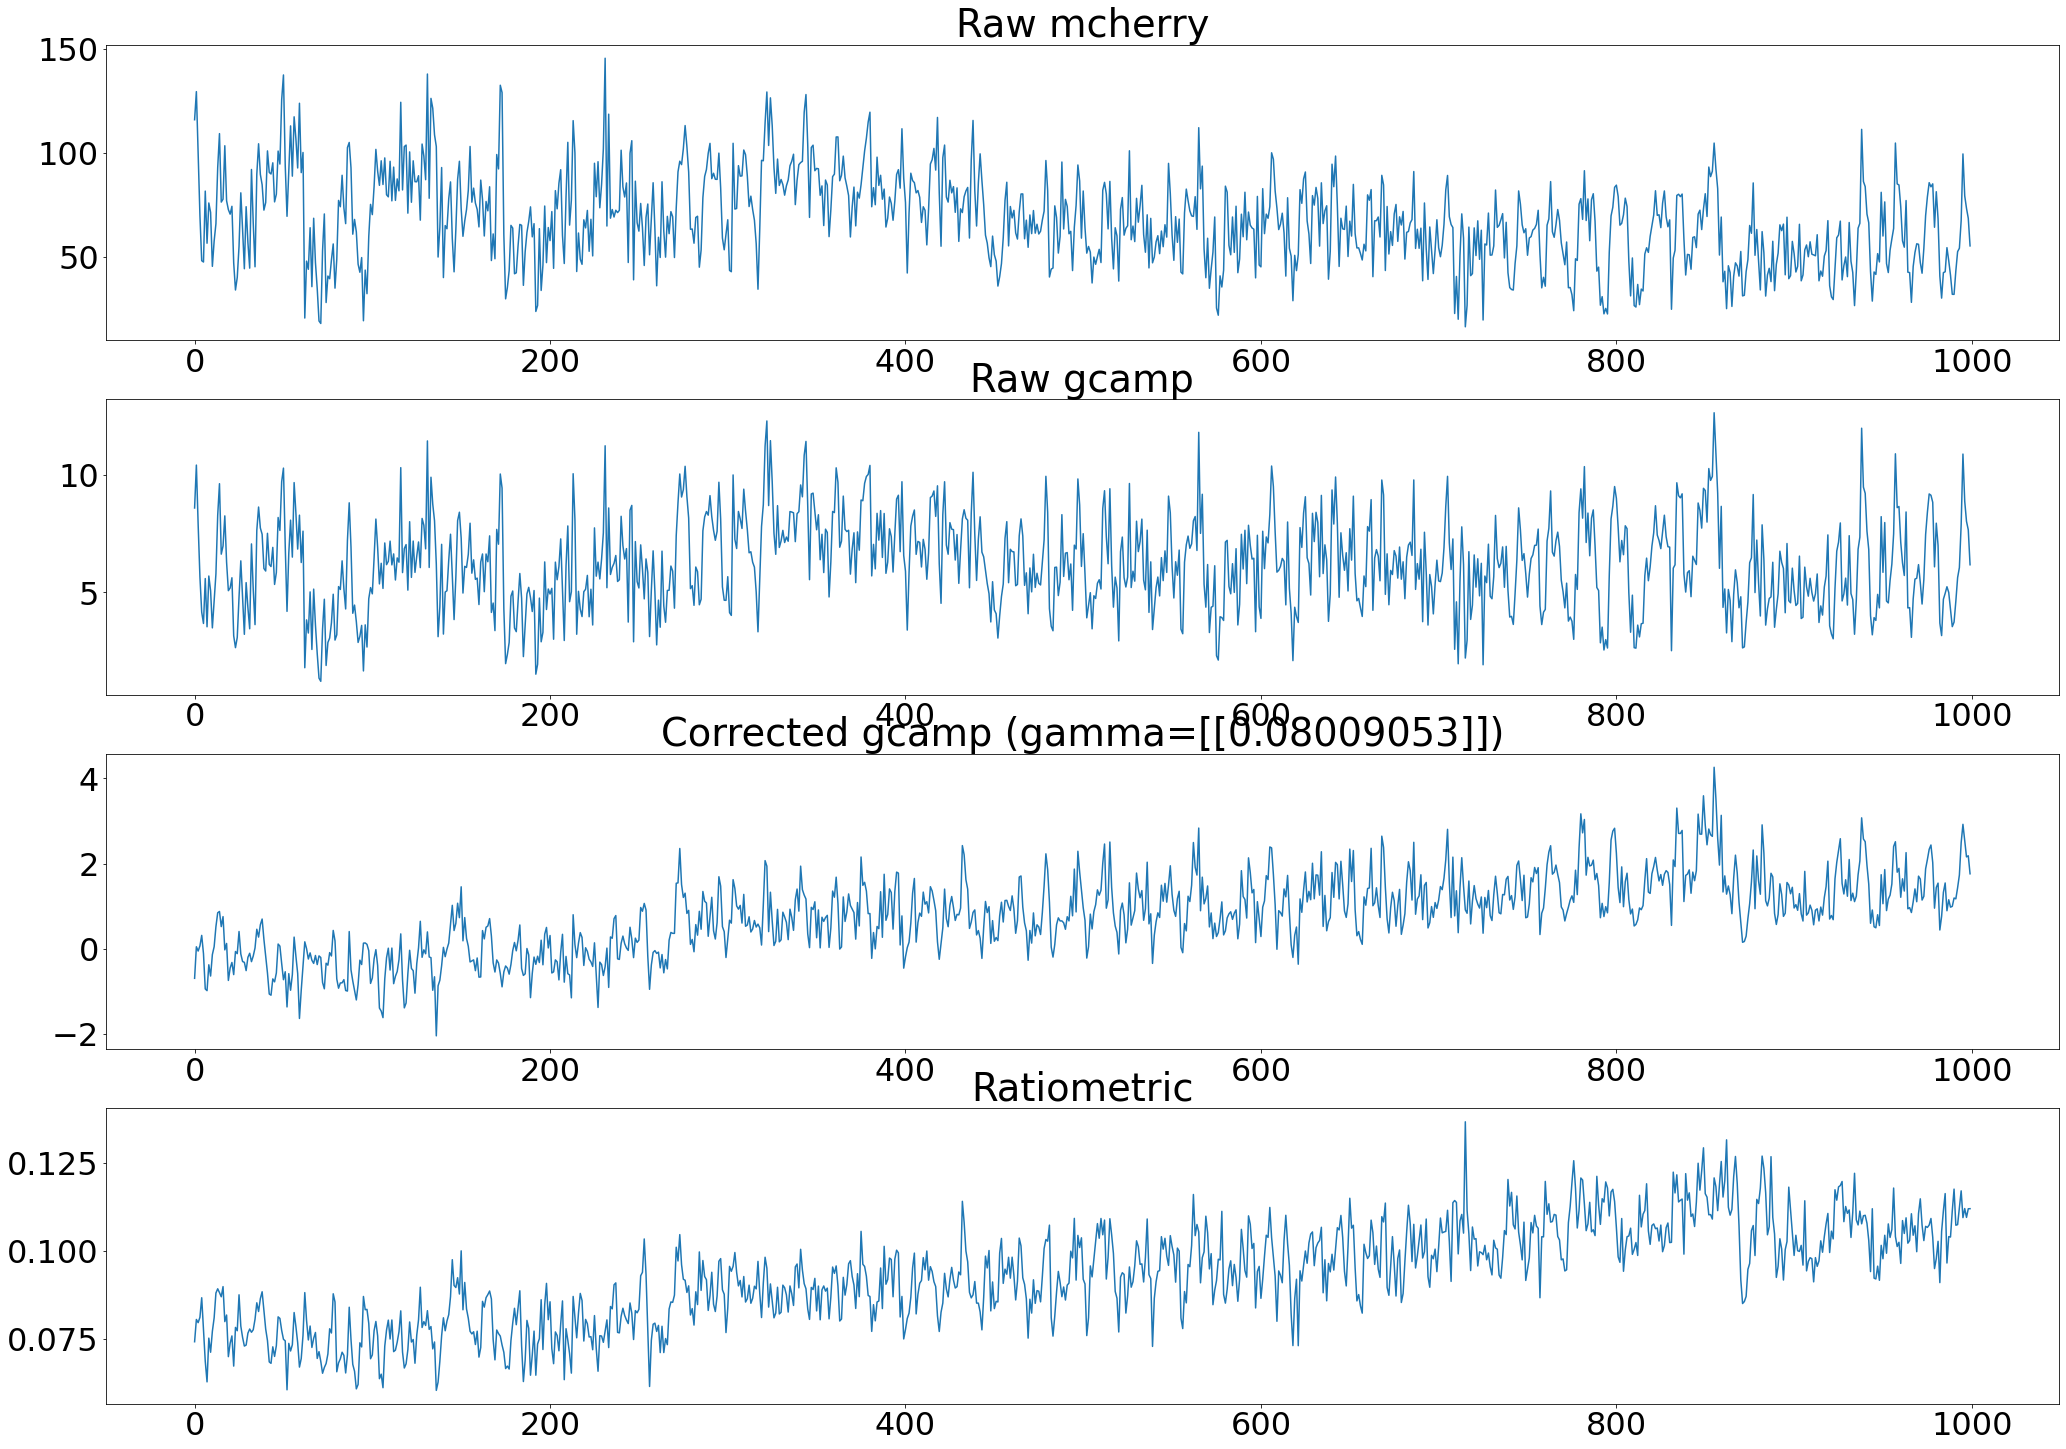

In [91]:
np.maximum(red, 5, red)

plt.figure(figsize=(35,25))
plt.rcParams.update({'font.size': 32})


plt.subplot(411)
plt.plot(red)
plt.title('Raw mcherry')

plt.subplot(412)
plt.plot(green)
plt.title('Raw gcamp')

plt.subplot(413)
plt.plot(gcamp_corrected)
plt.title(f'Corrected gcamp (gamma={gamma})')

plt.subplot(414)
reg = 0
plt.plot((green+reg) / (red+reg))
plt.title('Ratiometric')
# plt.ylim([0,3])

In [71]:
np.maximum(red, 1, red)


array([[ 51.466248 ],
       [ 77.580696 ],
       [ 75.971405 ],
       [ 64.844185 ],
       [ 63.332592 ],
       [ 68.63227  ],
       [ 67.6211   ],
       [ 78.432556 ],
       [ 74.59474  ],
       [ 61.279    ],
       [ 74.25502  ],
       [ 90.17312  ],
       [103.10624  ],
       [ 84.85888  ],
       [ 79.590645 ],
       [ 86.123825 ],
       [111.3539   ],
       [113.407425 ],
       [ 85.19248  ],
       [104.23706  ],
       [ 77.86641  ],
       [ 49.015644 ],
       [ 64.77398  ],
       [ 57.891323 ],
       [105.484436 ],
       [115.48881  ],
       [102.15216  ],
       [112.749306 ],
       [109.6281   ],
       [ 93.58024  ],
       [ 93.35801  ],
       [107.92437  ],
       [116.934135 ],
       [114.81461  ],
       [ 76.70602  ],
       [ 92.98126  ],
       [ 77.84892  ],
       [ 82.130615 ],
       [ 77.36665  ],
       [ 86.244896 ],
       [ 89.96619  ],
       [ 88.38037  ],
       [ 50.209328 ],
       [ 66.15297  ],
       [ 41.738567 ],
       [ 4

In [62]:
plt.figure(figsize=(35,25))


<Figure size 2520x1800 with 0 Axes>

<Figure size 2520x1800 with 0 Axes>

## Visualize ratio of mcherry and gcamp

In [42]:
which_neuron = 2

red = all_traces_3d[which_neuron]['mcherry']
green = all_traces_3d[which_neuron]['gcamp']

In [43]:
%matplotlib widget

In [44]:
plt.scatter(green, red)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
%matplotlib inline

In [9]:
plt.scatter(green, red)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …